In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install gradio


Enter the path of the ECG image file: /content/drive/MyDrive/preprocessed_ECG_images/History of MI/PMI(123).jpg


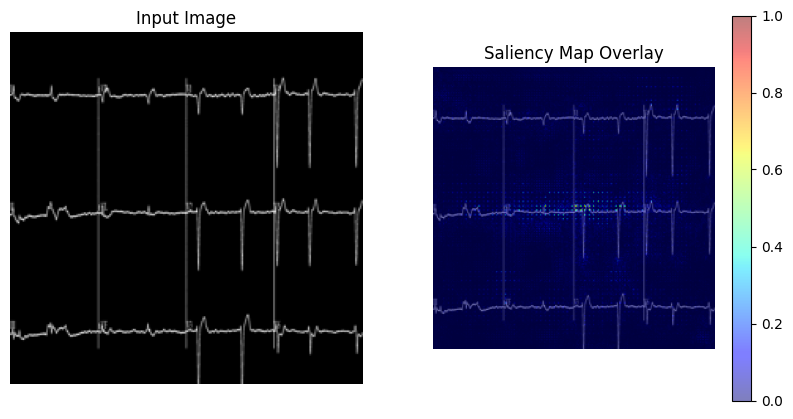

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image

# Define the model
model_path = "/content/drive/MyDrive/fused_model1"
weight_vgg = 2.0
model = tf.keras.models.load_model(model_path)

# Define preprocessing function
def preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.resize((224, 224))  # Resize to match model input size
    img_array = np.array(img) / 255.0  # Normalize
    return img_array

# Define the function to calculate saliency map and overlay it on the original image
def saliency(image_path, model):
    # Load and preprocess the image
    img = preprocess_image(image_path)

    # Convert to a TensorFlow tensor
    img_tensor = tf.convert_to_tensor(img, dtype=tf.float32)
    img_tensor = tf.expand_dims(img_tensor, axis=0)  # Add batch dimension

    # Compute gradients of the predicted class score w.r.t. input image
    with tf.GradientTape() as tape:
        tape.watch(img_tensor)
        predictions = model(img_tensor)
        predicted_class = tf.argmax(predictions[0])
        predicted_score = predictions[0][predicted_class]
    gradients = tape.gradient(predicted_score, img_tensor)

    # Calculate saliency map
    saliency_map = tf.reduce_max(tf.abs(gradients), axis=-1)[0]
    saliency_map = (saliency_map - tf.reduce_min(saliency_map)) / (tf.reduce_max(saliency_map) - tf.reduce_min(saliency_map))

    # Plot the original image and the saliency map as a single plot
    plt.figure(figsize=(10, 5))

    # Plot the original image
    plt.subplot(1, 2, 1)
    plt.title('Input Image')
    plt.imshow(img)
    plt.axis('off')

    # Plot the saliency map overlaying the original image
    plt.subplot(1, 2, 2)
    plt.title('Saliency Map Overlay')
    plt.imshow(img)
    plt.imshow(saliency_map, cmap='jet', alpha=0.5)
    plt.colorbar()  # Overlay saliency map with transparency
    plt.axis('off')

    plt.show()

# Get the image path from user input
image_path = input("Enter the path of the ECG image file: ")

# Generate and display the saliency map overlaying the original image
saliency(image_path, model)
# /content/drive/MyDrive/preprocessed_ECG_images
# /content/drive/MyDrive/preprocessed_ECG_images/Abnormal heartbeat/HB(2).jpg